# Project 2: Supervised Learning
### Building a Student Intervention System

## 1. Classification vs Regression

Your goal is to identify students who might need early intervention - which type of supervised machine learning problem is this, classification or regression? Why?

## 2. Exploring the Data

Let's go ahead and read in the student dataset first.

_To execute a code cell, click inside it and press **Shift+Enter**._

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Student data read successfully!


Now, can you find out the following facts about the dataset?
- Total number of students
- Number of students who passed
- Number of students who failed
- Graduation rate of the class (%)
- Number of features

_Use the code block below to compute these values. Instructions/steps are marked using **TODO**s._

### Data Exploration

In [3]:
student_data.columns

Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'paid',
       u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed'],
      dtype='object')

In [4]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [7]:
student_data.shape

(395, 31)

In [8]:
# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = len(student_data)
n_features = len(student_data.columns)
n_passed = student_data.passed.value_counts()[0]
n_failed = student_data.passed.value_counts()[1]
grad_rate = n_passed/float(n_students) * 100
print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Number of features: {}".format(n_features)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 31
Graduation rate of the class: 67.09%


## 3. Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Let's first separate our data into feature and target columns, and see if any features are non-numeric.<br/>
**Note**: For this dataset, the last column (`'passed'`) is the target or label we are trying to predict.

In [9]:
# Extract feature (X) and target (y) columns
feature_cols = list(student_data.columns[:-1])  # all columns but last are features
target_col = student_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = student_data[feature_cols]  # feature values for all students
y_all = student_data[target_col]  # corresponding targets/labels
print "\nFeature values:-"
X_all.head()  # print the first 5 rows

Feature column(s):-
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
Target column: passed

Feature values:-


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Preprocess feature columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation.

In [10]:
# Preprocess feature columns
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'school' => 'school_GP', 'school_MS'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

X_all = preprocess_features(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48):-
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Split data into training and test sets

So far, we have converted all _categorical_ features into numeric values. In this next step, we split the data (both features and corresponding labels) into training and test sets.

In [11]:
from sklearn.cross_validation import train_test_split

In [12]:
# First, decide how many training vs test samples you want
#num_all = student_data.shape[0]  # same as len(student_data)
#num_train = 300  # about 75% of the data
#num_test = num_all - num_train


# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.3, random_state = 42)

#X_train = ?
#y_train = ?
#X_test = ?
#y_test = ?
print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 276 samples
Test set: 119 samples


## Feature Selection

To enhance efficiency it would be best to limit features (limit dimensionality) in our model. This strategy will consist of:

1.  Feature selection using SelectKBest with chi^2 scoring
2.  Try feature selection using RFECV (Recursive Feature Elimination with Cross Validation)
3.  Generate plots as a reality check for features selected to visualize trends and likely impact
4.  Follow up both strategies to gauge performance and run metrics with and without feature selection

### SelectKBest with Chi^2

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Pre-processed Features

In [14]:
k = 20
k_best = SelectKBest(chi2, k= k)
k_best.fit(X_train, y_train)
scores_kchi2 = k_best.scores_
pairs = zip(X_all.columns, scores_kchi2)

# combined scores and features into a pandas dataframe then sort 

k_best_features = pd.DataFrame(pairs,columns = ['feature','score'])
k_best_features = k_best_features.sort_values(by= 'score',ascending = False)

k_best_features = k_best_features.reset_index(drop = True)

k_best_features.head(k)

,feature,score
0,failures,49.514058
1,absences,15.986899
2,goout,3.629403
3,paid,2.784097
4,reason_reputation,2.137619
5,Mjob_health,1.848214
6,Dalc,1.731429
7,romantic,1.286560
8,schoolsup,1.164116
9,reason_course,1.137605


Results suggest that many features may not be useful for predicting drop out.  I'd like to visualize this. To make it manageable I will bin features by score and use those groups for calculation and plotting purposes.

#### Plots

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
# recombine X_all and y_all

combined_X_y = X_all.join(y_all)

# create a binary measure of passed where yes = 1 and no = 0

combined_X_y['passed_binary'] = np.where(combined_X_y.passed == 'yes', 1,0)

combined_X_y.columns

Index([u'school_GP', u'school_MS', u'sex_F', u'sex_M', u'age', u'address_R',
       u'address_U', u'famsize_GT3', u'famsize_LE3', u'Pstatus_A',
       u'Pstatus_T', u'Medu', u'Fedu', u'Mjob_at_home', u'Mjob_health',
       u'Mjob_other', u'Mjob_services', u'Mjob_teacher', u'Fjob_at_home',
       u'Fjob_health', u'Fjob_other', u'Fjob_services', u'Fjob_teacher',
       u'reason_course', u'reason_home', u'reason_other', u'reason_reputation',
       u'guardian_father', u'guardian_mother', u'guardian_other',
       u'traveltime', u'studytime', u'failures', u'schoolsup', u'famsup',
       u'paid', u'activities', u'nursery', u'higher', u'internet', u'romantic',
       u'famrel', u'freetime', u'goout', u'Dalc', u'Walc', u'health',
       u'absences', u'passed', u'passed_binary'],
      dtype='object')

C:\Users\vhim98198\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


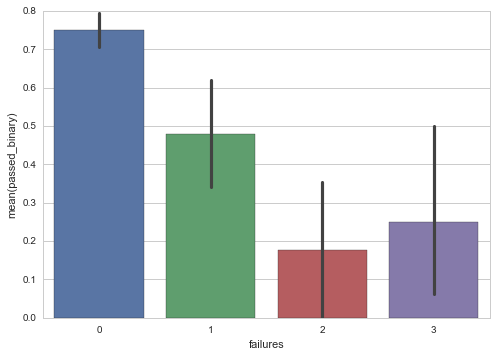

In [17]:
sns.barplot(x="failures", y= 'passed_binary', order= [0,1,2,3],data= combined_X_y);

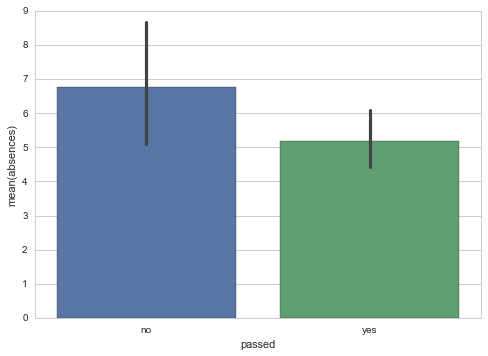

In [18]:
sns.barplot(x= combined_X_y.passed, y= combined_X_y.absences)

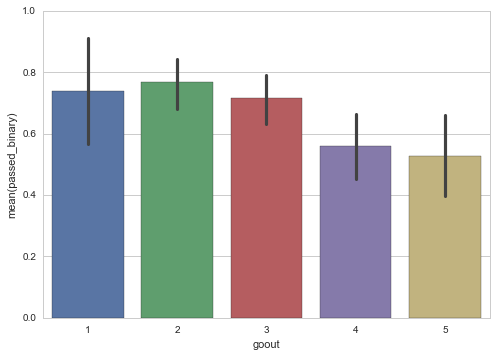

In [19]:
sns.barplot(x="goout", y="passed_binary", order= [1,2,3,4,5],data= combined_X_y);

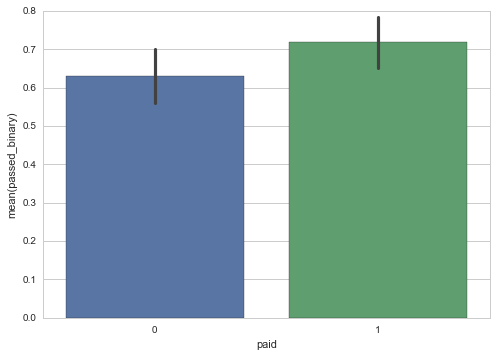

In [20]:
sns.barplot(x="paid", y= 'passed_binary',data= combined_X_y);

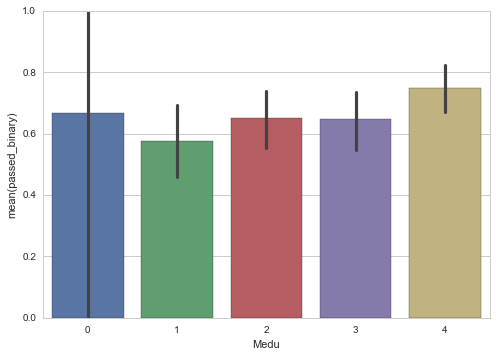

In [21]:
sns.barplot(x="Medu", y= 'passed_binary', order= [0,1,2,3,4], data= combined_X_y);

# 4. Training and Evaluating Models
Choose 3 supervised learning models that are available in scikit-learn, and appropriate for this problem. For each model:

- What is the theoretical O(n) time & space complexity in terms of input size?
- What are the general applications of this model? What are its strengths and weaknesses?
- Given what you know about the data so far, why did you choose this model to apply?
- Fit this model to the training data, try to predict labels (for both training and test sets), and measure the F<sub>1</sub> score. Repeat this process with different training set sizes (100, 200, 300), keeping test set constant.

Produce a table showing training time, prediction time, F<sub>1</sub> score on training set and F<sub>1</sub> score on test set, for each training set size.

Note: You need to produce 3 such tables - one for each model.

### Functions and Imports

Functions and associated imports for this section.

In [62]:
import time


# Train a model
def train_classifier(clf, X_train, y_train):
    #print "Training {}... \n".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    #print "Done!\nTraining time (secs): {:.3f}".format(end - start)
    return end - start

from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    #print "Predicting labels using {}... \n".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    #print "Done!\nPrediction time (secs): {:.3f} \n".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    #print "------------------------------------------"
    #print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    #print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    #print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))
    f1_score_train = predict_labels(clf, X_train, y_train)
    f1_score_test = predict_labels(clf, X_test, y_test)
    training_time = train_classifier(clf, X_train, y_train)
    
    return training_time, f1_score_train, f1_score_test

def build_clf_metrics_table(metrics_dict):
    clf_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
    clf_df.columns = ["training_time(s)", "f1_train","f1_test"]
    clf_df = clf_df.sort_index()
    clf_df = clf_df.reset_index()
    clf_df.rename(columns={'index':'train_size'},inplace=True)
    return clf_df


def build_melted_metrics_table(df):
    

    cols_train = [x for x in df.columns if x != 'f1_test']
    cols_test = [x for x in df.columns if x != 'f1_train']

    df_train = df[cols_train]
    df_train['kind'] = 'train'
    df_train.rename(columns= {'f1_train': 'f1'}, inplace= True)

    df_test = df[cols_test]
    df_test['kind'] = 'test'
    df_test.rename(columns= {'f1_test': 'f1'}, inplace= True)

    return df_train.append(df_test)

def gen_test_train_plot(data):
    plot = sns.pointplot(x= 'train_size', y= 'f1', hue= 'kind', data = data)
    return plot

# Train and predict using different training set sizes, now with less printy goodness
def train_predict_noprint(clf, X_train, y_train, X_test, y_test):
    #print "------------------------------------------"
    #print "Training set size: {}".format(len(X_train))
    train_classifier(clf, X_train, y_train)
    #print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    #print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))
    f1_score_train = predict_labels(clf, X_train, y_train)
    f1_score_test = predict_labels(clf, X_test, y_test)
    training_time = train_classifier(clf, X_train, y_train)
    
    return training_time, f1_score_train, f1_score_test

### Adaboost All Features

In [177]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
F1 score for training set: 0.892156862745 

F1 score for test set: 0.764705882353 



In [174]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, 276]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train[:size],
                                                                 y_train[:size], X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   
    

In [175]:
adaboost_metrics = build_clf_metrics_table(metrics)
adaboost_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.104,1.000000,0.771739
1,50,0.094,0.972973,0.739394
2,100,0.078,0.896552,0.729412
3,200,0.078,0.865385,0.788571
4,276,0.078,0.839806,0.758621


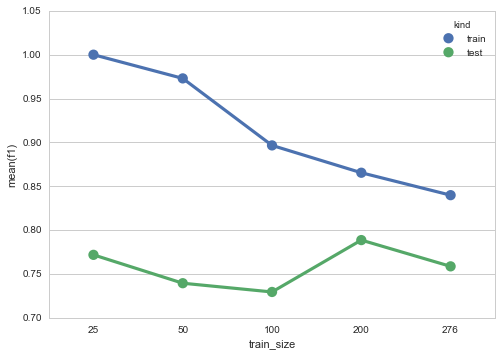

In [176]:
adaboost_melted = build_melted_metrics_table(adaboost_metrics)

adaboost_plot = gen_test_train_plot(adaboost_melted)

### Multnomial Bayes All Features

In [172]:
# TODO: Choose a model, import it and instantiate an object
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1 score for training set: 0.81662591687 

F1 score for test set: 0.785714285714 



In [169]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, 276]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train[:size],
                                                                 y_train[:size], X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   

In [170]:
mnb_metrics = build_clf_metrics_table(metrics)
mnb_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.012,0.863636,0.760417
1,50,0.004,0.837209,0.760417
2,100,0.004,0.807947,0.765714
3,200,0.004,0.844720,0.775281
4,276,0.008,0.818824,0.786127


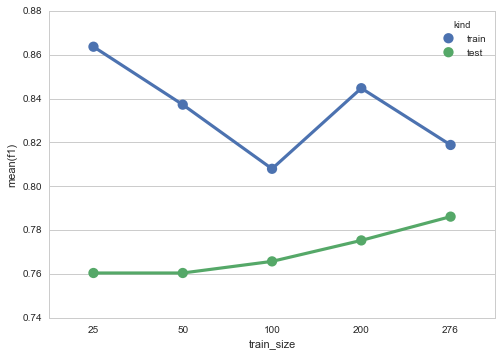

In [171]:
mnb_melted = build_melted_metrics_table(mnb_metrics)

mnb_plot = gen_test_train_plot(mnb_melted)

### Support Vector Machine All Features

In [71]:
# TODO: Choose a model, import it and instantiate an object
from sklearn import svm
clf = svm.SVC()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
F1 score for training set: 0.886836027714 

F1 score for test set: 0.774193548387 



In [72]:
# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

sizes = [25, 50, 100, 200, 276]

metrics = {}
for size in sizes:
    training_time, f1_score_train, f1_score_test = train_predict(clf, X_train[:size],
                                                                 y_train[:size], X_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[size] = metrics_list   

In [73]:
svc_metrics = build_clf_metrics_table(metrics)
svc_metrics

,train_size,training_time(s),f1_train,f1_test
0,25,0.000,0.883721,0.760417
1,50,0.004,0.878049,0.760417
2,100,0.004,0.868421,0.760870
3,200,0.012,0.874618,0.770053
4,276,0.020,0.886836,0.774194


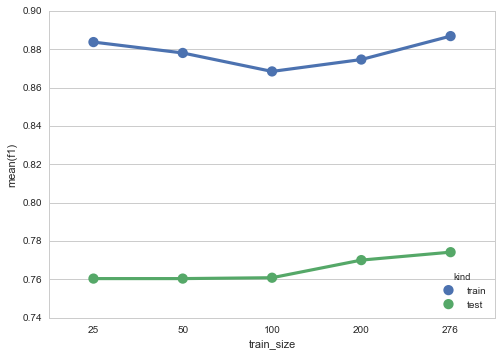

In [74]:
svc_melted = build_melted_metrics_table(svc_metrics)

svc_plot = gen_test_train_plot(svc_melted)

### Classifiers with Reduced Feature Set

- Cut Feature set with SelectKBest and Chi^2 Scoring
- Test classifiers with reduced set

### Adaboost

In [144]:
# TODO: Choose a model, import it and instantiate an object
clf = AdaBoostClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train, y_train)
    X_chi2_test = X_chi2.transform(X_test)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 
    

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
F1 score for training set: 0.892156862745 

F1 score for test set: 0.764705882353 

{'test': (119, 1), 'train': (276, 1)}
{'test': (119, 2), 'train': (276, 2)}
{'test': (119, 4), 'train': (276, 4)}
{'test': (119, 10), 'train': (276, 10)}
{'test': (119, 20), 'train': (276, 20)}
{'test': (119, 48), 'train': (276, 48)}


In [145]:
adaboost_metrics = build_clf_metrics_table(metrics)
adaboost_metrics

,train_size,training_time(s),f1_train,f1_test
0,1,0.395,0.838565,0.784530
1,2,0.406,0.858491,0.795455
2,4,0.391,0.867299,0.790960
3,10,0.391,0.859189,0.779661
4,20,0.555,0.871921,0.776471
5,48,0.438,0.892157,0.764706


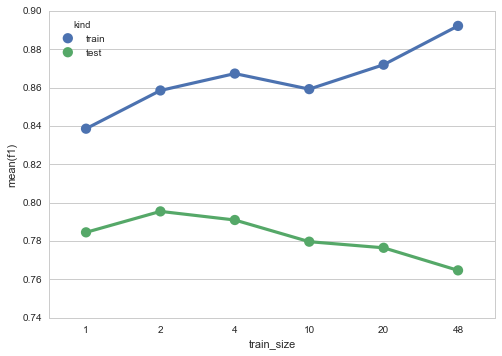

In [146]:
adaboost_melted = build_melted_metrics_table(adaboost_metrics)

adaboost_plot = gen_test_train_plot(adaboost_melted)

### Mulnomial Bayes

In [147]:
# TODO: Choose a model, import it and instantiate an object
clf = MultinomialNB()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train, y_train)
    X_chi2_test = X_chi2.transform(X_test)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 
    

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1 score for training set: 0.81662591687 

F1 score for test set: 0.785714285714 

{'test': (119, 1), 'train': (276, 1)}
{'test': (119, 2), 'train': (276, 2)}
{'test': (119, 4), 'train': (276, 4)}
{'test': (119, 10), 'train': (276, 10)}
{'test': (119, 20), 'train': (276, 20)}
{'test': (119, 48), 'train': (276, 48)}


In [148]:
mbn_metrics = build_clf_metrics_table(metrics)
mbn_metrics

,train_size,training_time(s),f1_train,f1_test
0,1,0.004,0.820513,0.760417
1,2,0.004,0.836449,0.802260
2,4,0.004,0.824940,0.797688
3,10,0.004,0.834123,0.793103
4,20,0.004,0.808824,0.788235
5,48,0.000,0.816626,0.785714


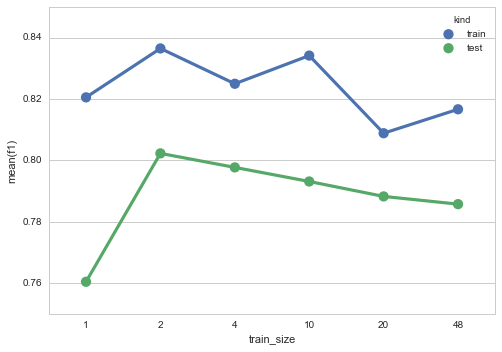

In [152]:
mbn_melted = build_melted_metrics_table(mbn_metrics)

mbn_plot = gen_test_train_plot(mbn_melted)

### SVC

In [153]:
# TODO: Choose a model, import it and instantiate an object
clf = svm.SVC()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf

# Predict on training set and compute F1 score
train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {} \n".format(train_f1_score)

# Predict on test data
print "F1 score for test set: {} \n".format(predict_labels(clf, X_test, y_test))

# TODO: Run the helper function above for desired subsets of training data
# Note: Keep the test set constant

numfeatures = [1,2, 4, 10, 20, 48]

metrics = {}
for num in numfeatures:
    

    X_chi2 = SelectKBest(chi2, k= num)
    
    X_chi2_train = X_chi2.fit_transform(X_train, y_train)
    X_chi2_test = X_chi2.transform(X_test)
    
    print {'train':X_chi2_train.shape,
          'test':X_chi2_test.shape}
    
    
    

    
    training_time, f1_score_train, f1_score_test = train_predict_noprint(clf, X_chi2_train,
                                                                 y_train, X_chi2_test, y_test)
    
    metrics_list = [training_time, f1_score_train, f1_score_test]
    
    metrics[num] = metrics_list 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
F1 score for training set: 0.886836027714 

F1 score for test set: 0.774193548387 

{'test': (119, 1), 'train': (276, 1)}
{'test': (119, 2), 'train': (276, 2)}
{'test': (119, 4), 'train': (276, 4)}
{'test': (119, 10), 'train': (276, 10)}
{'test': (119, 20), 'train': (276, 20)}
{'test': (119, 48), 'train': (276, 48)}


In [154]:
svc_metrics = build_clf_metrics_table(metrics)
svc_metrics

,train_size,training_time(s),f1_train,f1_test
0,1,0.008,0.838565,0.784530
1,2,0.016,0.869767,0.784530
2,4,0.016,0.877698,0.782123
3,10,0.016,0.881517,0.769231
4,20,0.020,0.898824,0.784530
5,48,0.031,0.886836,0.774194


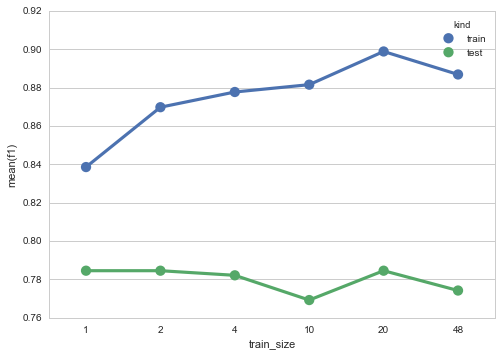

In [155]:
svc_melted = build_melted_metrics_table(svc_metrics)

svc_plot = gen_test_train_plot(svc_melted)

## 5. Choosing the Best Model

- Based on the experiments you performed earlier, in 1-2 paragraphs explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?
- In 1-2 paragraphs explain to the board of supervisors in layman's terms how the final model chosen is supposed to work (for example if you chose a Decision Tree or Support Vector Machine, how does it make a prediction).
- Fine-tune the model. Use Gridsearch with at least one important parameter tuned and with at least 3 settings. Use the entire training set for this.
- What is the model's final F<sub>1</sub> score?

In [ ]:
# TODO: Fine-tune your model and report the best F1 score